In [46]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

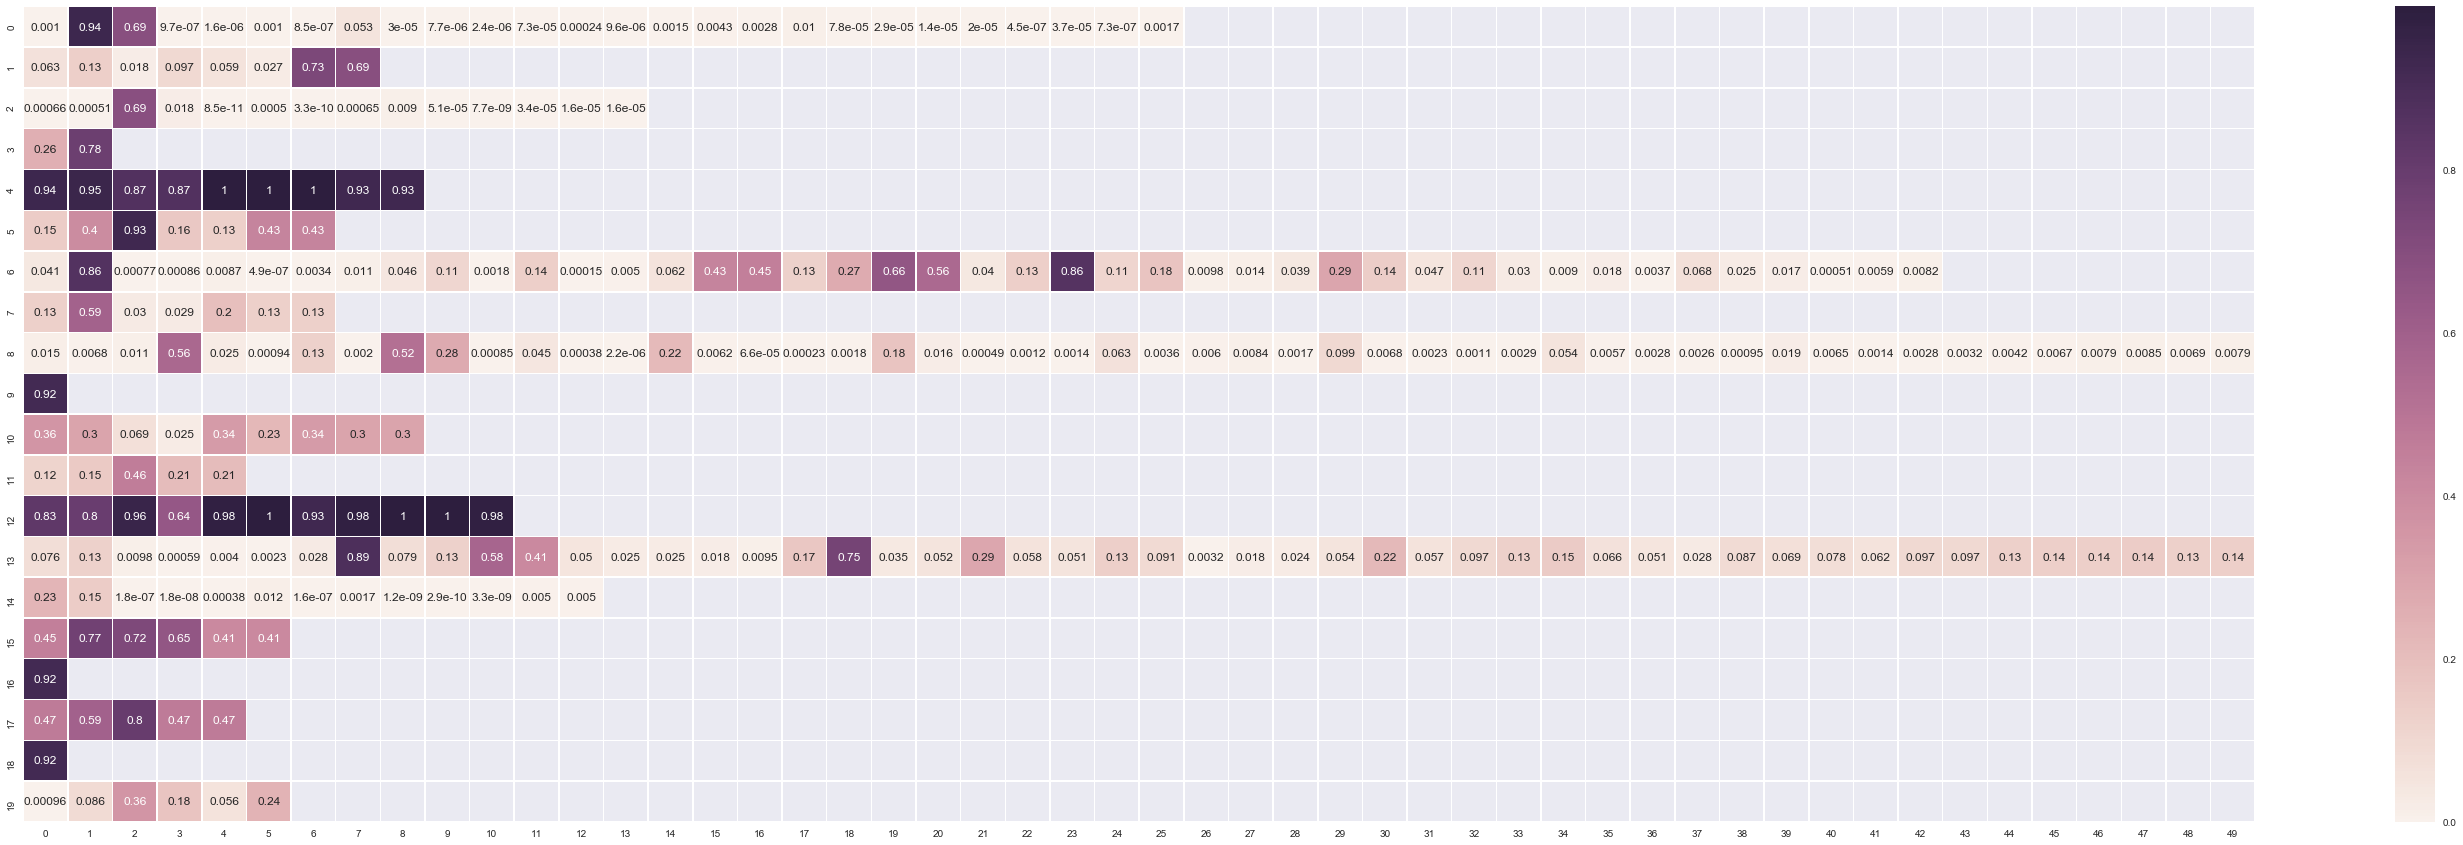

In [50]:
epoch = 1
batch = 1

mc = pickle.load( open( "/Users/macbook975/Documents/Stage/GAN_NMT_model/data_MC/MC_file_"+ str(epoch) + "_"+ str(batch) + ".txt", "rb" ) )
for sent_idx in range(len(mc)):
    for reward_idx in range(len(mc[sent_idx][2])):
        mc[sent_idx][2][reward_idx] =  np.array(mc[sent_idx][2][reward_idx]).mean()
data = pd.DataFrame(data=mc, columns=['en', 'fr', 'reward'])
reward_data = pd.DataFrame([x for x in data.reward])
fr_data = pd.DataFrame([x for x in data.fr])

sns.set()
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 15))
sns.heatmap(reward_data, annot=True, linewidths=.5, ax=ax)

In [ ]:
#data.head()
#reward_data.head()
#fr_data.head()

In [44]:
sentence_index = 41
print('Source: ', mc[sentence_index][0])
print('Target: ', mc[sentence_index][1])
print('Reward: ', mc[sentence_index][2])

Source:  ['the', 'Japanese', 'islands', 'run', 'northeast', 'to', 'southwest', 'in', 'the', 'northwestern', 'part', 'of', 'the', 'Pacific', 'Ocean', '.', '', '', '', '', '', '', '', '', '', '']
Target:  ['à', 'la', 'partie', 'partie', 'de', "l'", 'partie', 'de', 'la', 'partie']
Reward:  [0.0035656553 0.0731396 0.0067594768 0.087377913 0.72154301 0.00014043285
 0.00087907503 0.20920713 0.0001045332 0.00062834431]


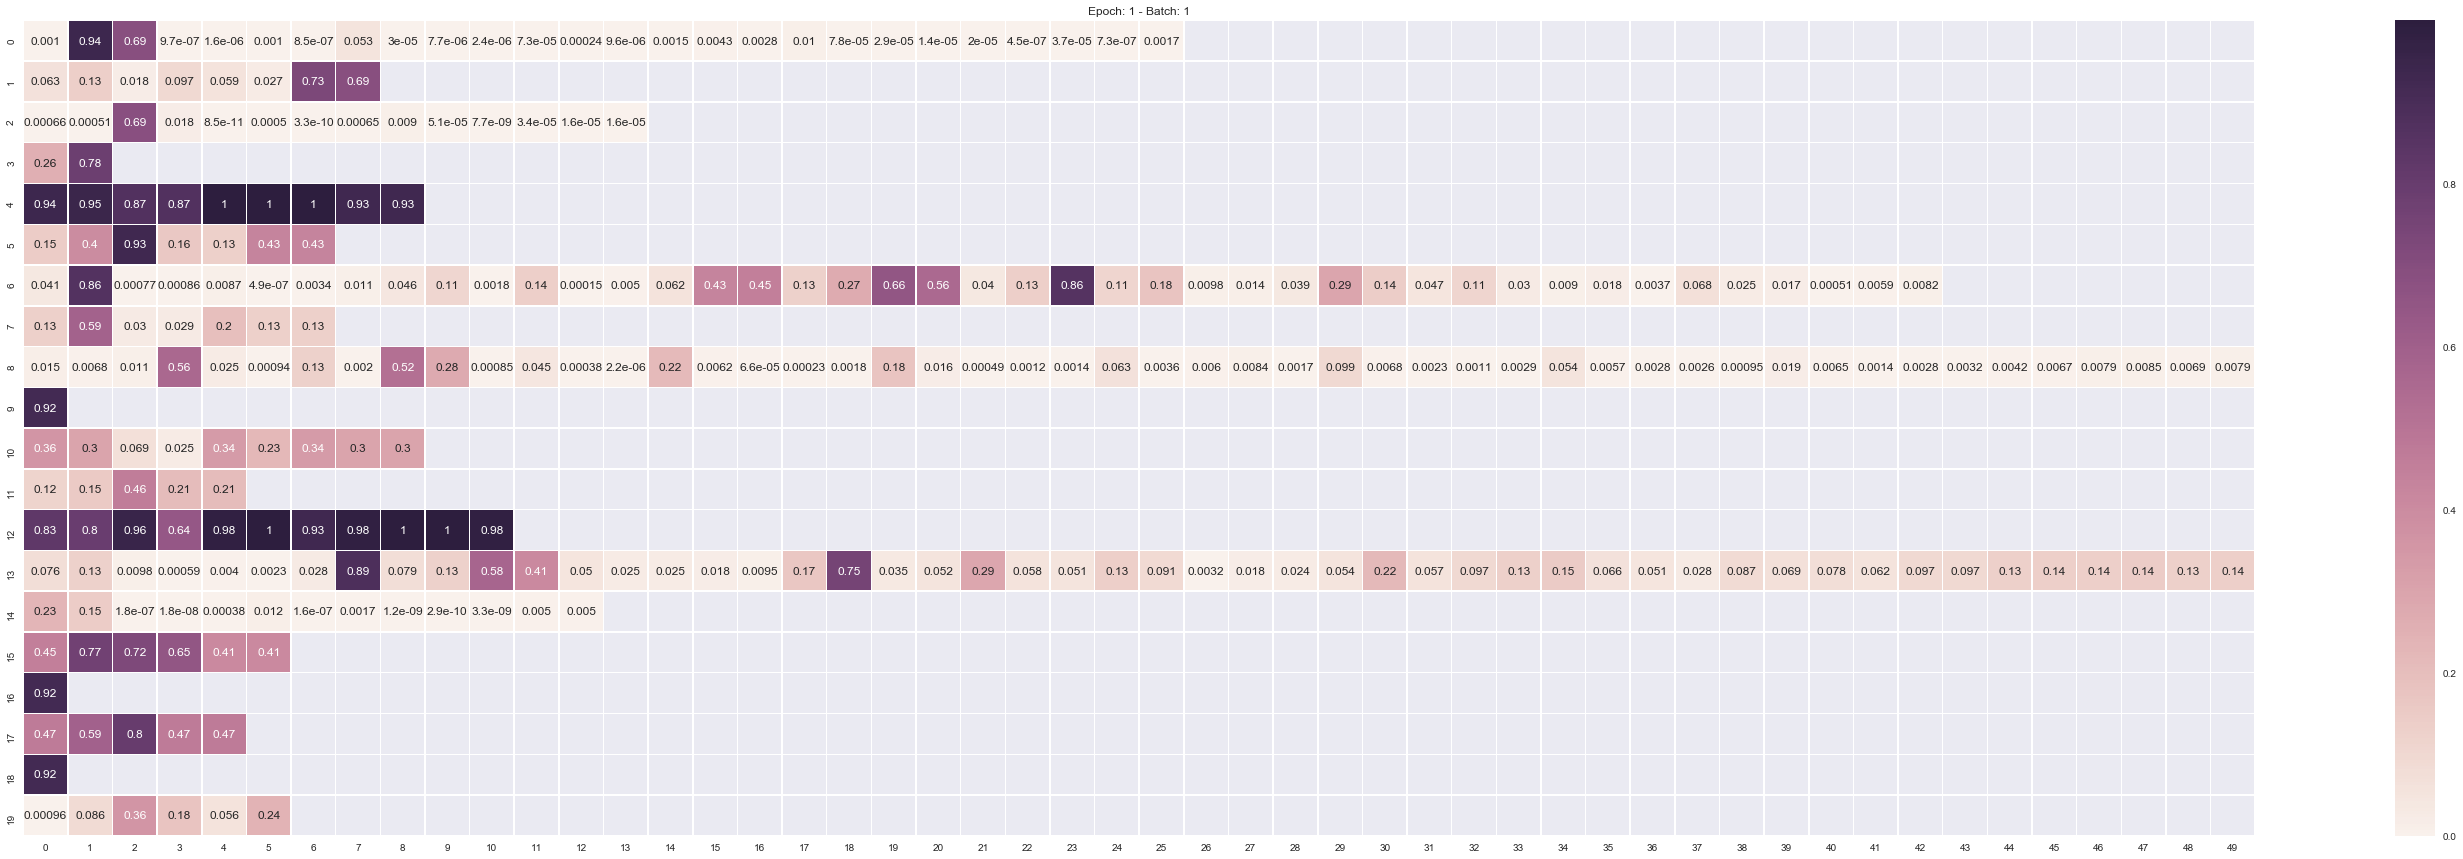

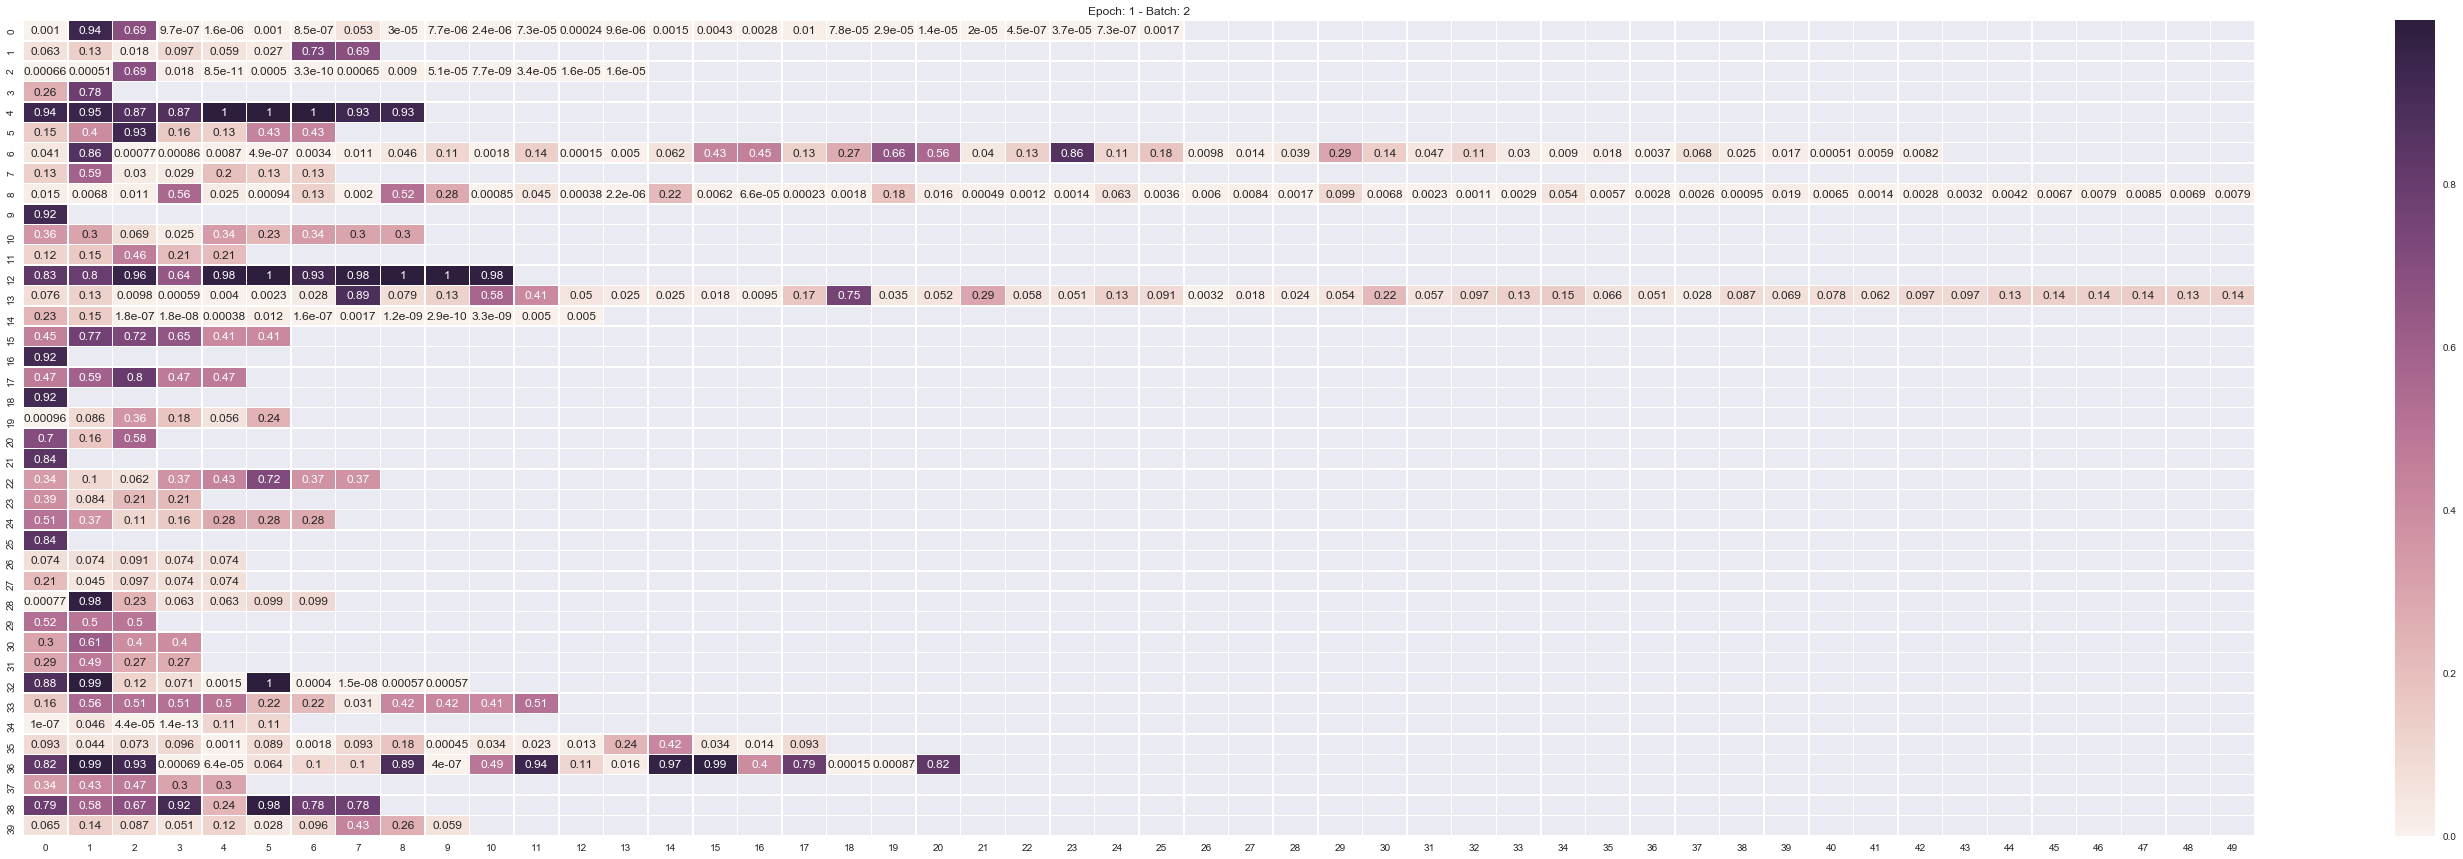

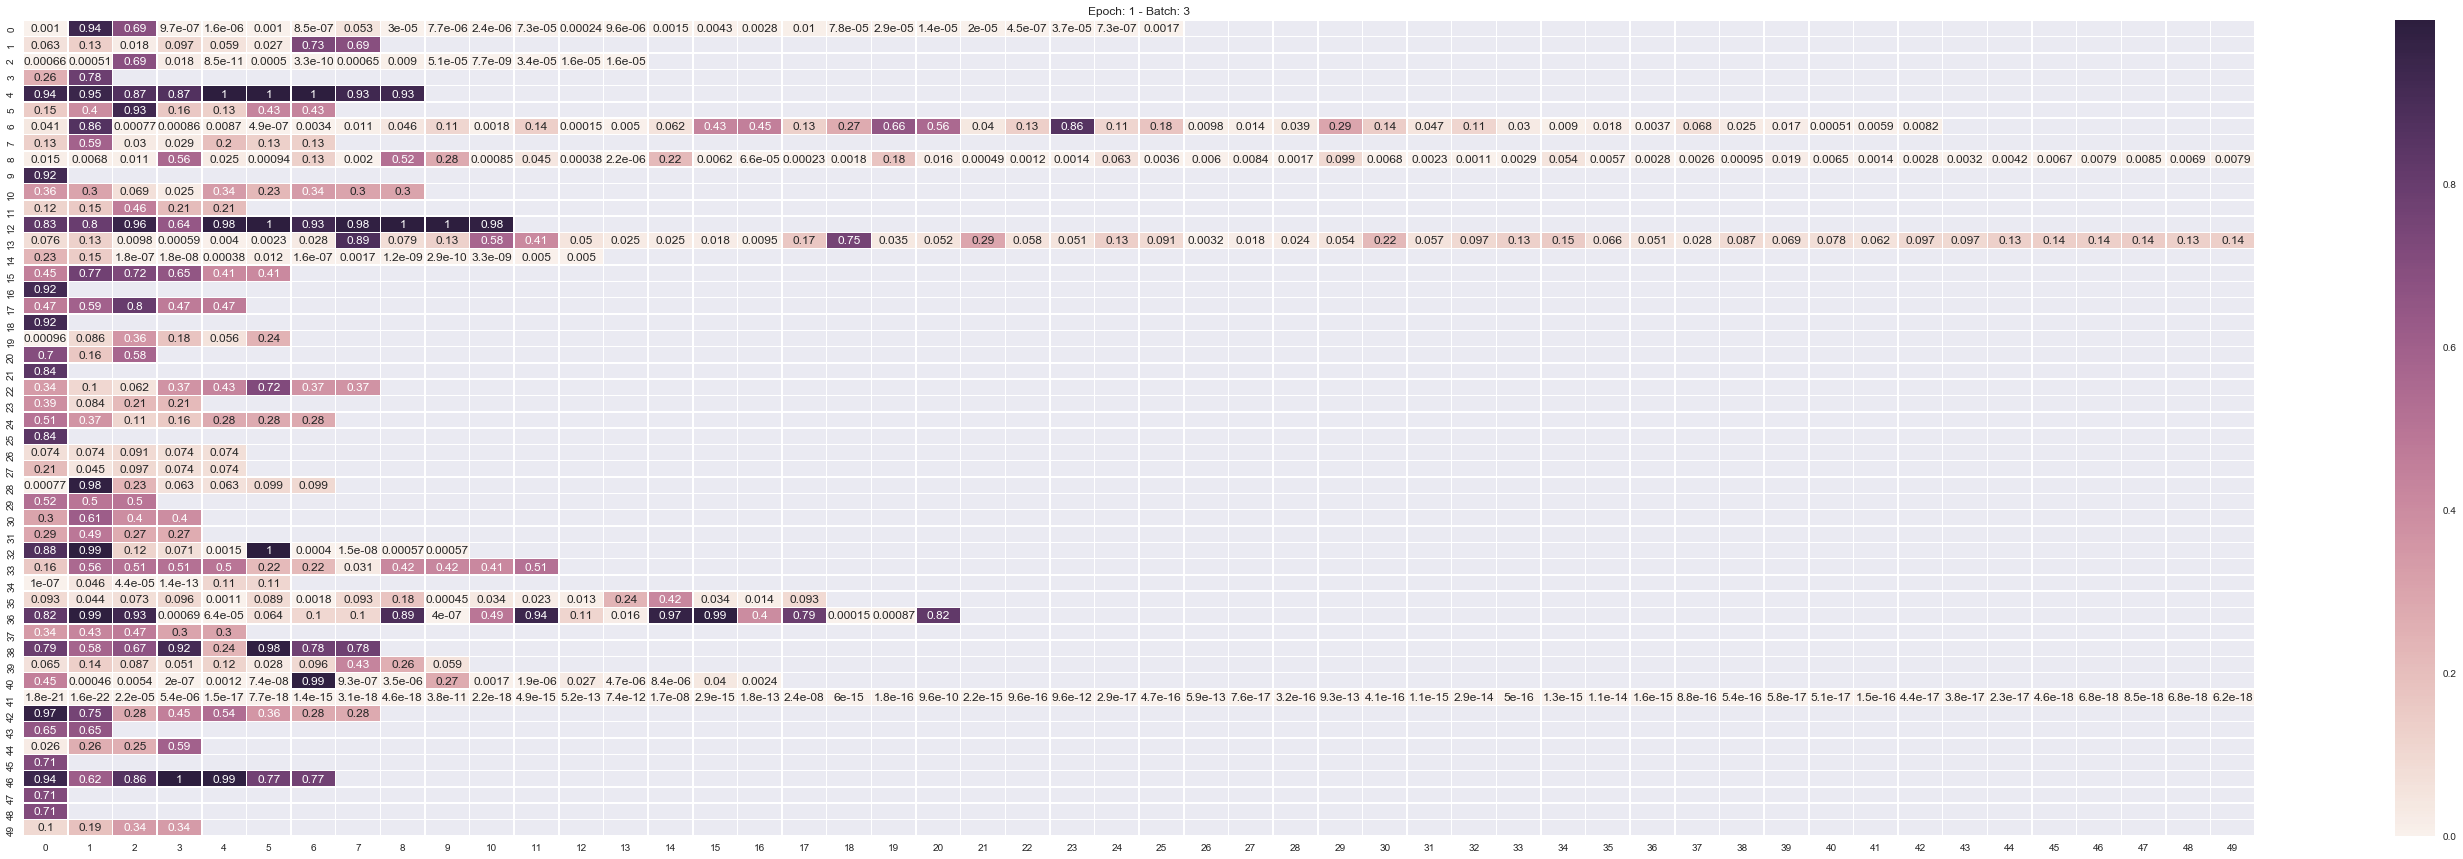

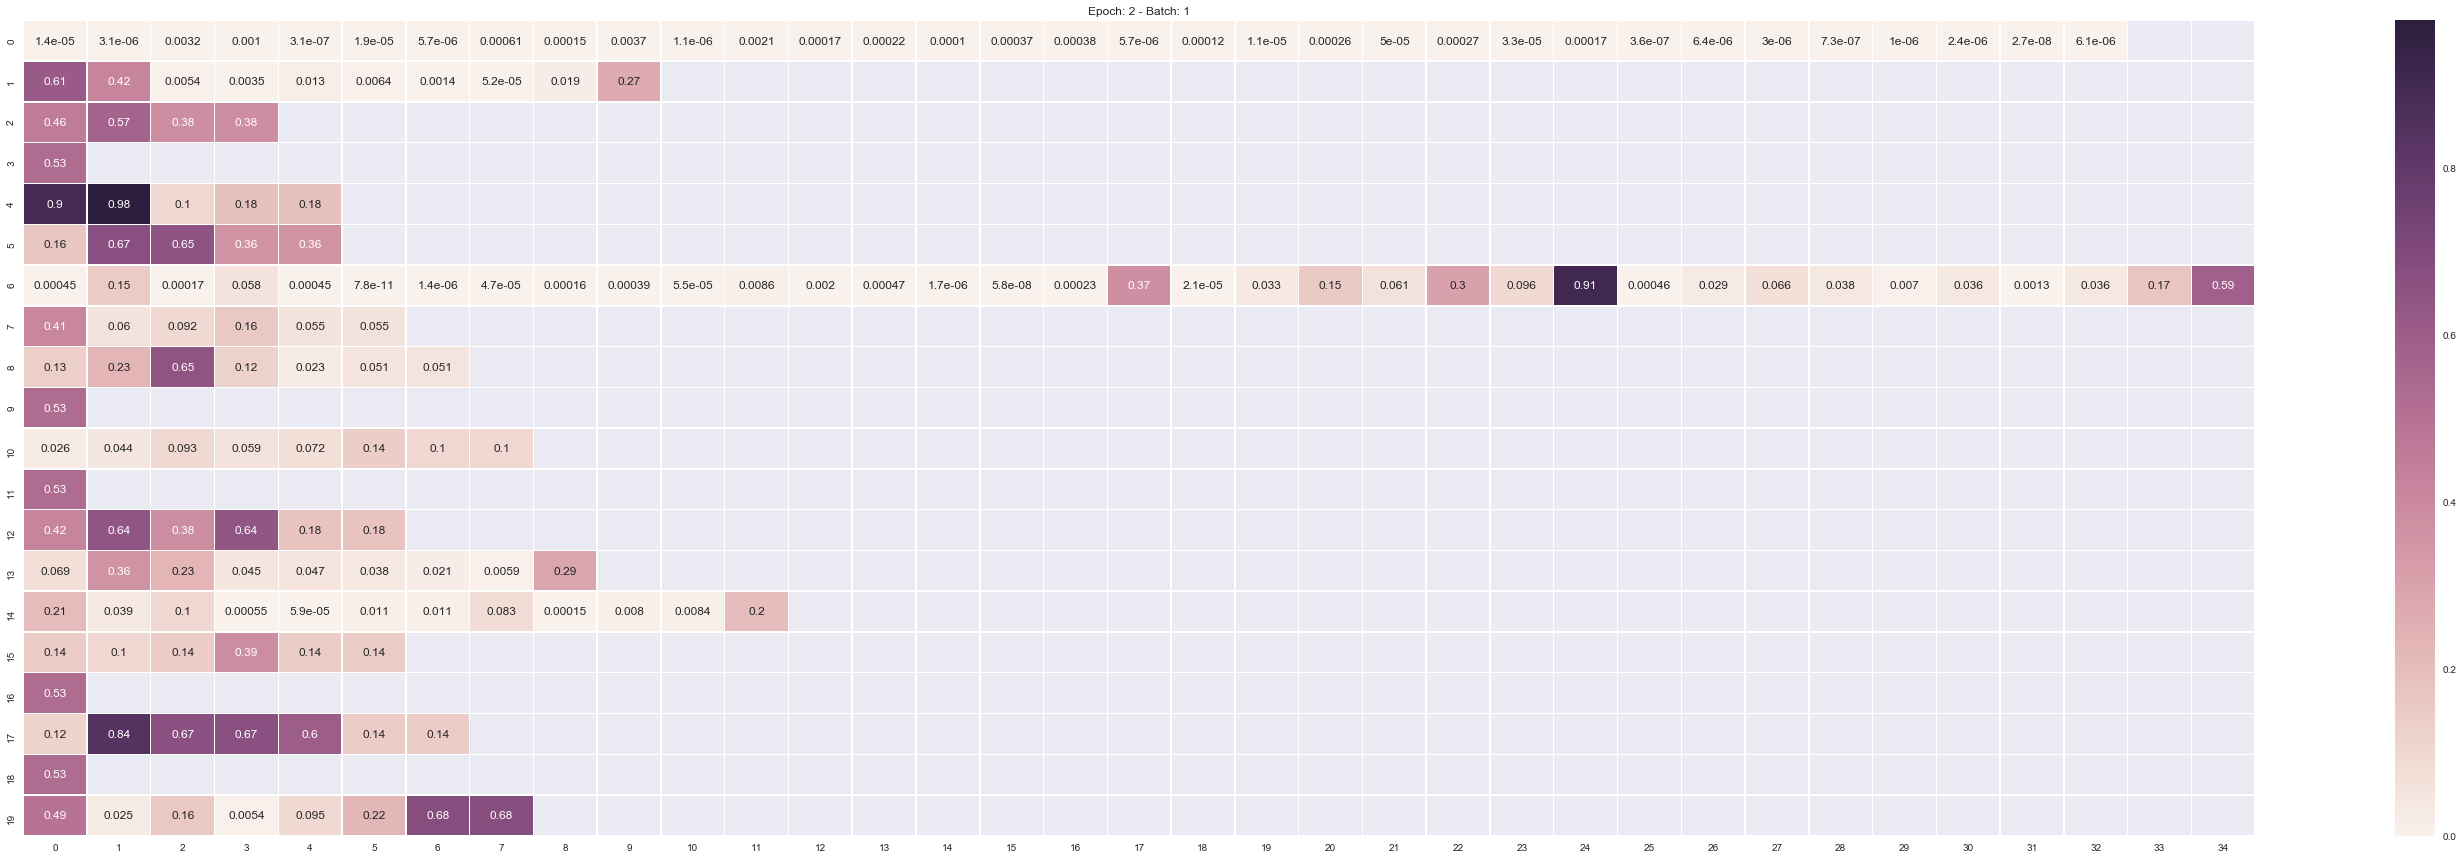

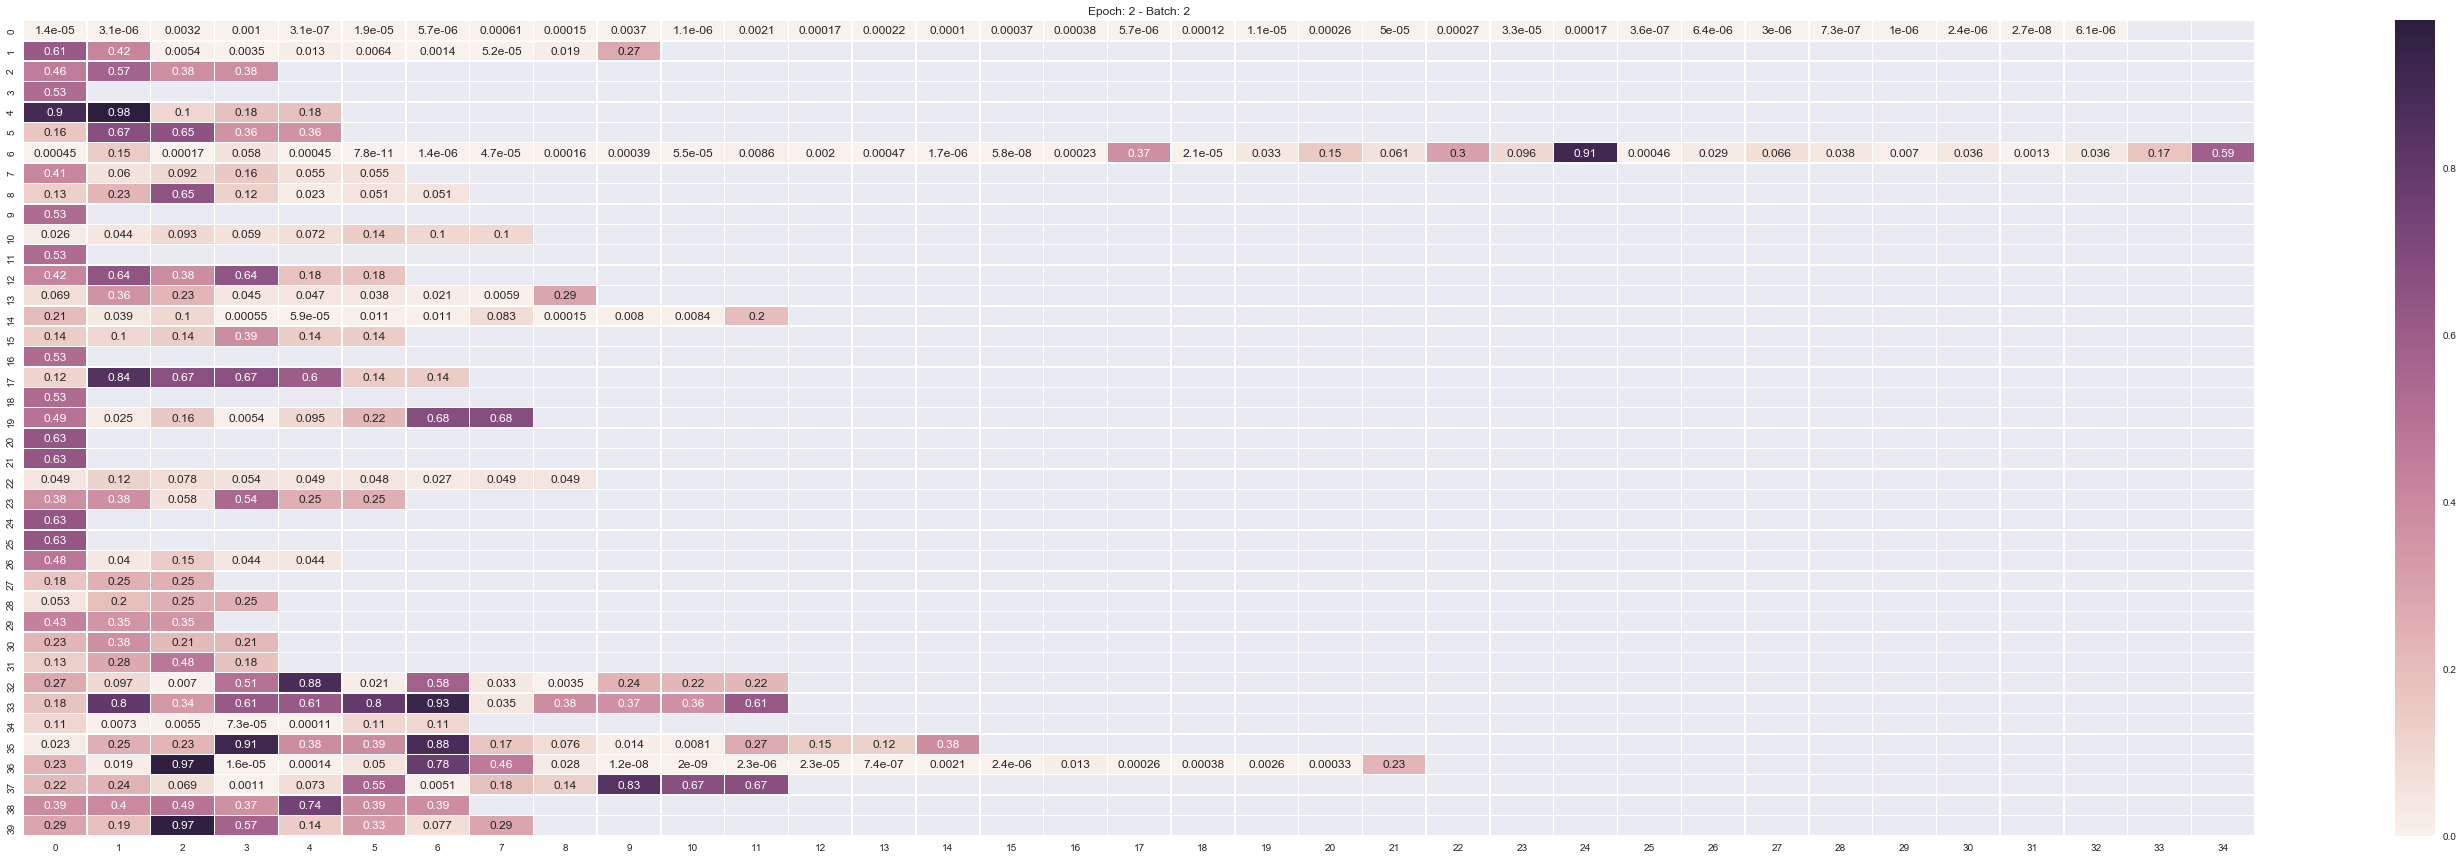

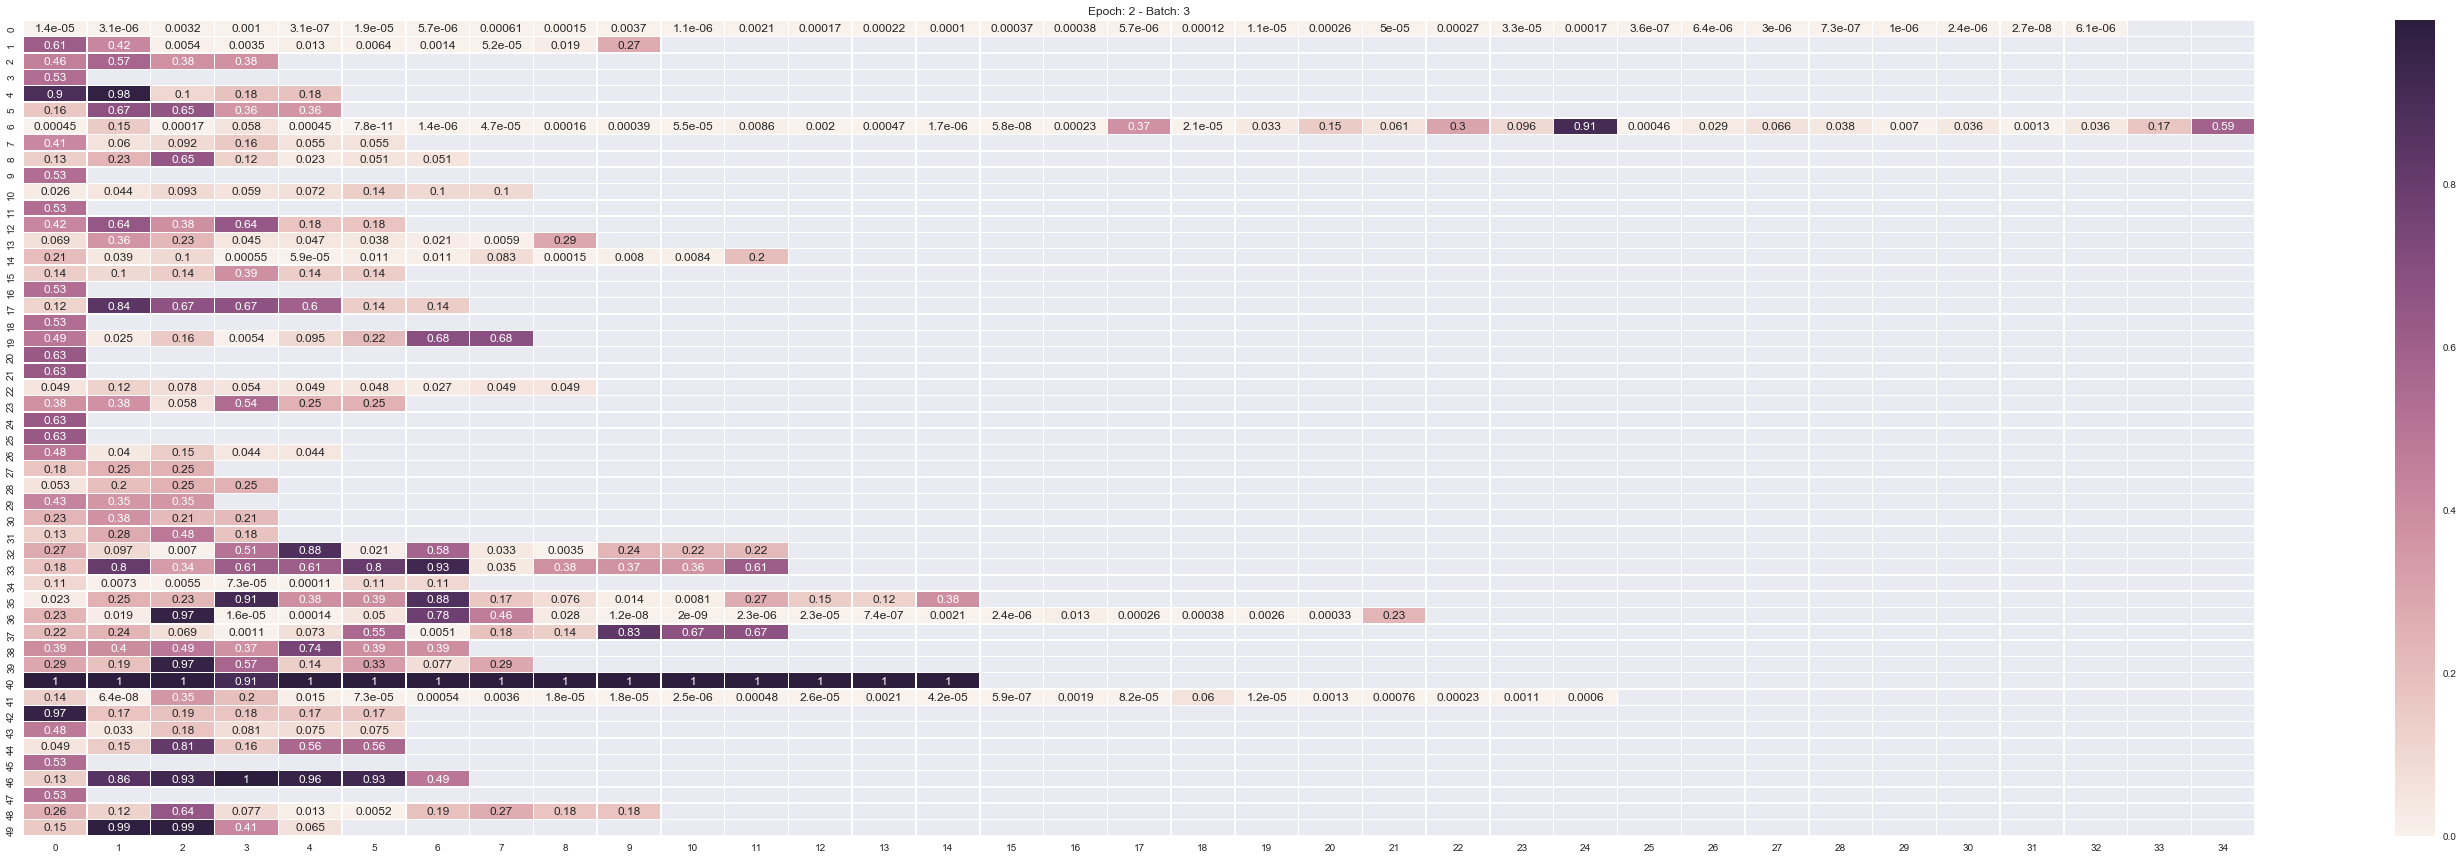

In [65]:
epoch_from = 1
epoch_to = 2
batch_from = 1
batch_to = 3
for epoch in range(epoch_from, epoch_to+1):
    for batch in range(batch_from, batch_to+1):
        mc = pickle.load( open( "/Users/macbook975/Documents/Stage/GAN_NMT_model/data_MC/MC_file_"+ str(epoch) + "_"+ str(batch) + ".txt", "rb" ) )
        for sent_idx in range(len(mc)):
            for reward_idx in range(len(mc[sent_idx][2])) :
                mc[sent_idx][2][reward_idx] =  np.array(mc[sent_idx][2][reward_idx]).mean()
        data = pd.DataFrame(data=mc, columns=['en', 'fr', 'reward'])
        reward_data = pd.DataFrame([x for x in data.reward],  )
        fr_data = pd.DataFrame([x for x in data.fr])
        f, ax = plt.subplots(figsize=(50, 15))
        sns.set()
        sns.plt.title('Epoch: ' + str(epoch) + ' - Batch: ' + str(batch))
        sns.heatmap(reward_data, annot=True, linewidths=.5, ax=ax)
        #sns.heatmap(reward_data, annot=True, linewidths=.5, ax=ax, vmin=0.4, vmax=0.5)

### 

In [ ]:
%matplotlib inline
sns.stripplot(data=reward_data[12:13])